In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv('Arima_Rathnapura.csv',parse_dates=['Month'], index_col='Month')

In [3]:
data.head()

,Production/Kg
Month,
2016-01-01,6114284.0
2016-02-01,5452146.0
2016-03-01,5424558.0
2016-04-01,6383458.0
2016-05-01,6552106.0


In [4]:
data.dtypes

Production/Kg    float64
dtype: object

In [5]:
data=data.groupby('Month')['Production/Kg'].sum().reset_index()

In [6]:
data.head()

,Month,Production/Kg
0,2016-01-01,6114284.0
1,2016-02-01,5452146.0
2,2016-03-01,5424558.0
3,2016-04-01,6383458.0
4,2016-05-01,6552106.0


In [7]:
data=data.set_index('Month')

In [8]:
data.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
      

In [9]:
y=data['Production/Kg'].resample('MS').mean()

In [10]:
y[0:15]

Month
2016-01-01    6114284.0
2016-02-01    5452146.0
2016-03-01    5424558.0
2016-04-01    6383458.0
2016-05-01    6552106.0
2016-06-01    6156702.0
2016-07-01    5151927.0
2016-08-01    5895116.0
2016-09-01    4301391.0
2016-10-01    4649146.0
2016-11-01    6180374.0
2016-12-01    5736142.0
2017-01-01    4964228.0
2017-02-01    4006759.0
2017-03-01    6241046.0
Freq: MS, Name: Production/Kg, dtype: float64

<Axes: xlabel='Month'>

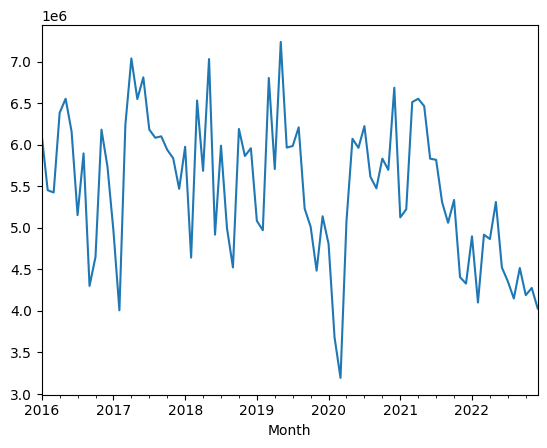

In [11]:
y.plot()

In [12]:
y_train=y[:len(y)-11]
y_test=y[(len(y)-11):]

In [13]:
y_train[-2:]

Month
2021-12-01    4328616.0
2022-01-01    4897273.0
Freq: MS, Name: Production/Kg, dtype: float64

<Axes: xlabel='Month'>

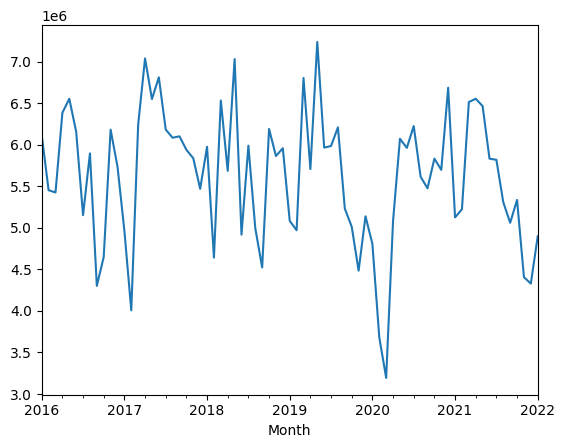

In [14]:
y_train.plot()

<Axes: xlabel='Month'>

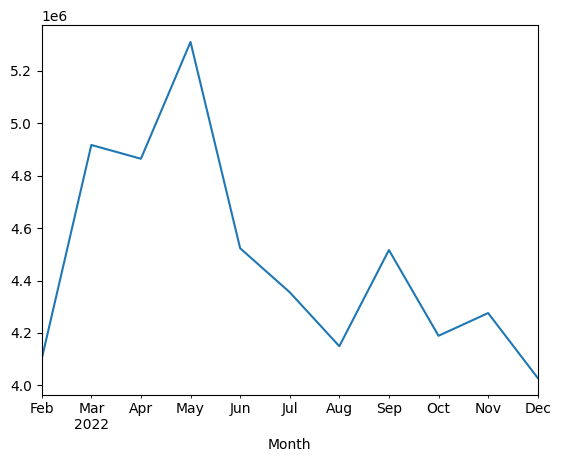

In [15]:
y_test.plot()

In [16]:
result=adfuller(y_train)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values: ')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))



ADF Statistics: -2.812773
p-value: 0.056472
Critical Values: 
	1%: -3.539
	5%: -2.909
	10%: -2.592


<Axes: xlabel='Month'>

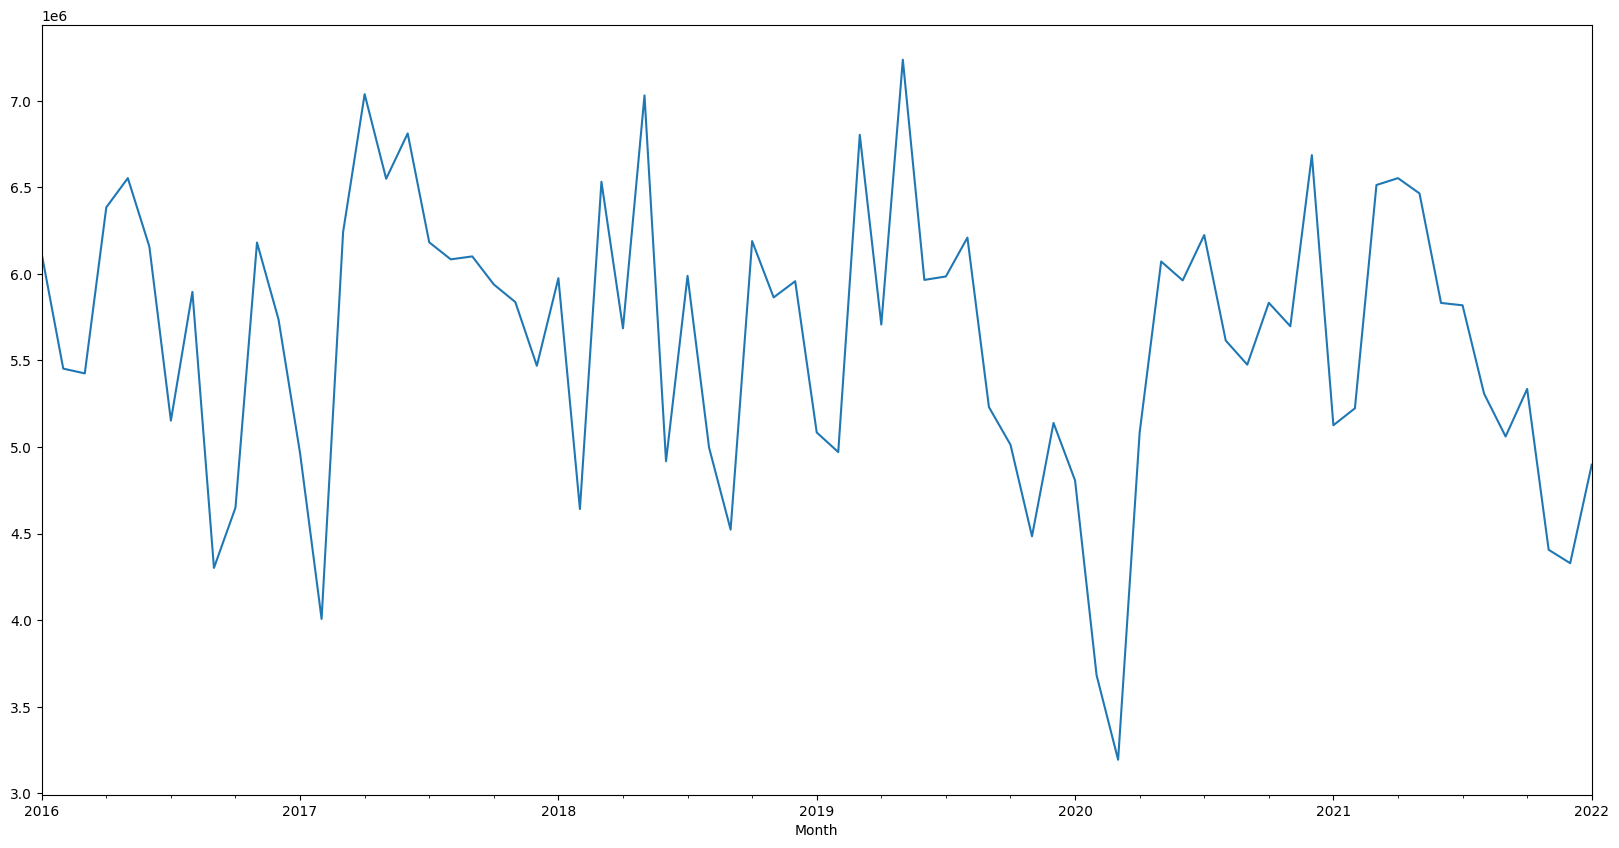

In [17]:
y_train.plot(figsize=(20,10))

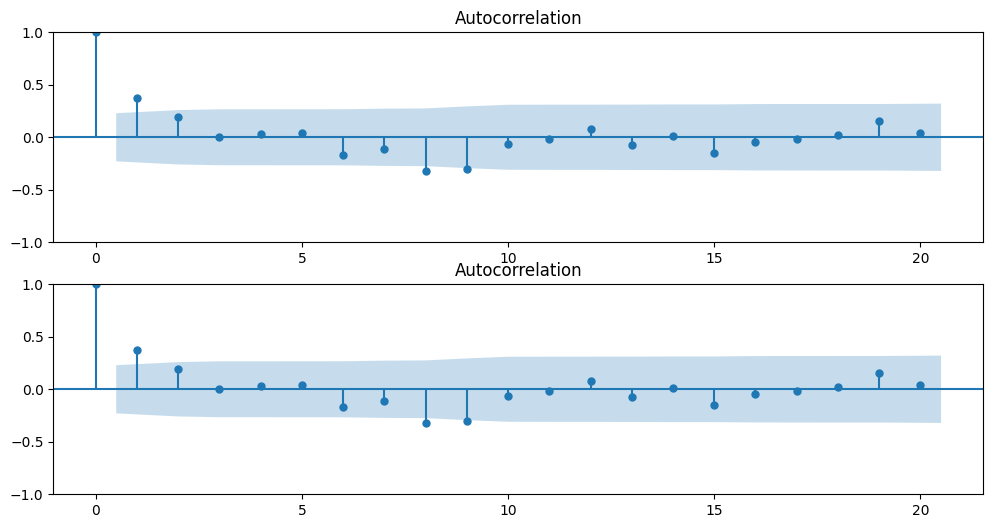

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(y_train,ax=ax[0],lags=20)
ax[1] = plot_acf(y_train,ax=ax[1],lags=20)

In [41]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: statsmodels in c:\users\ranasinghe\appdata\local\programs\python\python311\lib\site-packages (0.14.2)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


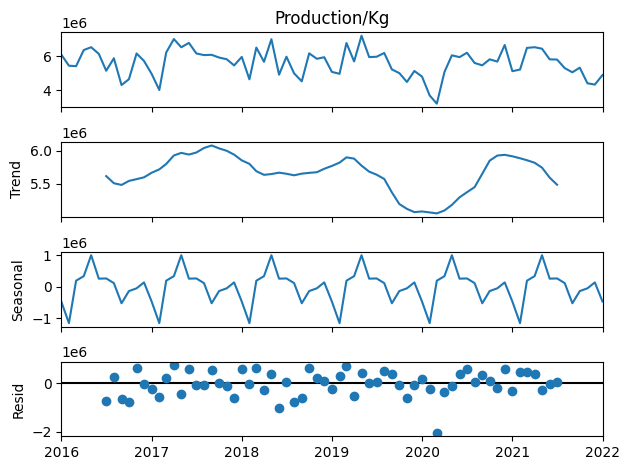

In [19]:
ts_decomp=sm.tsa.seasonal_decompose(y_train,model='additive')
ts_decomp.plot()
plt.show()

In [20]:
import itertools

p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Sesonal ARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[4]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[5]))






Examples of parameter combinations for Sesonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 0, 1) x (0, 1, 1, 12)
SARIMAX: (0, 0, 1) x (1, 0, 0, 12)
SARIMAX: (0, 0, 1) x (1, 0, 1, 12)


In [21]:
metric_aic_dict=dict()

for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model =sm.tsa.statespace.SARIMAX(y_train,
                                             order=pm,
                                             seasonal_order=pm_seasonal,
                                             enforce_stationaryity=False,
                                             enforce_invertibility=False)
            model_aic=model.fit()
            print(f'ARIMA{pm}x{pm_seasonal}12 - AIC:{model_aic.aic}')
            metric_aic_dict.update({(pm,pm_seasonal)}):model_aic.aic})
        except:
            continue

SyntaxError: unmatched '}' (1956116196.py, line 13)

In [22]:
metric_aic_dict = dict()

for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y_train,
                                               order=pm,
                                               seasonal_order=pm_seasonal,
                                               enforce_stationaryity=False,
                                               enforce_invertibility=False)
            model_aic = model.fit()
            print(f'ARIMA{pm}x{pm_seasonal}12 - AIC:{model_aic.aic}')
            metric_aic_dict[(pm, pm_seasonal)] = model_aic.aic  # Correct dictionary update
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2479.8503581366335
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2444.820373195155
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1874.7332342876737
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1877.9481517855138
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2282.150428951485
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2268.1562509390556
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1885.9698389192706
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1876.1078479358048
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2433.7689501799
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2427.572375447329
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1868.559388903916
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1867.042872417541
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2423.8386392963503
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2425.3153033540148
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1887.9237672167544
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1868.7732296468969
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2181.5191708102866
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2184.0068567774597


In [57]:
{k:v for k,v in sorted(metric_aic_dict.items(),key=lambda x:x[1])}

{((0, 1, 1), (0, 1, 1, 12)): 1823.744920089214,
 ((1, 1, 1), (0, 1, 1, 12)): 1825.514404017904,
 ((0, 1, 1), (1, 1, 1, 12)): 1825.645418919681,
 ((1, 1, 0), (0, 1, 1, 12)): 1826.760254371987,
 ((1, 1, 1), (1, 1, 1, 12)): 1827.346440042341,
 ((0, 1, 1), (1, 1, 0, 12)): 1827.7934876487154,
 ((1, 1, 0), (1, 1, 1, 12)): 1828.753532054618,
 ((1, 1, 1), (1, 1, 0, 12)): 1829.5899597160487,
 ((0, 1, 0), (1, 1, 1, 12)): 1830.3633433482253,
 ((1, 1, 0), (1, 1, 0, 12)): 1830.6501425182282,
 ((0, 1, 0), (0, 1, 1, 12)): 1833.1061059923838,
 ((0, 1, 0), (1, 1, 0, 12)): 1834.8580890088338,
 ((1, 1, 1), (0, 1, 0, 12)): 1842.8385938363074,
 ((0, 1, 1), (0, 1, 0, 12)): 1842.8594151992236,
 ((1, 1, 0), (0, 1, 0, 12)): 1845.9669767255477,
 ((0, 1, 0), (0, 1, 0, 12)): 1849.5511886892807,
 ((1, 0, 1), (0, 1, 1, 12)): 1859.5640616795813,
 ((1, 0, 1), (1, 1, 1, 12)): 1863.0453847841347,
 ((1, 0, 1), (1, 1, 0, 12)): 1863.2131375483152,
 ((1, 0, 0), (0, 1, 1, 12)): 1865.3069032464005,
 ((1, 0, 0), (1, 1, 0, 12)

In [95]:
model = sm.tsa.statespace.SARIMAX(y_train,
                                   order=(0,1,1),
                                   seasonal_order=(0,1,1,12),
                                   enforce_stationaryity=False,
                                   enforce_invertibility=False)
model_aic = model.fit()
print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3539      0.089     -3.972      0.000      -0.529      -0.179
ma.S.L12      -0.6007      0.142     -4.235      0.000      -0.879      -0.323
sigma2      1.062e+12   1.35e-14   7.86e+25      0.000    1.06e+12    1.06e+12


In [92]:
model_aic

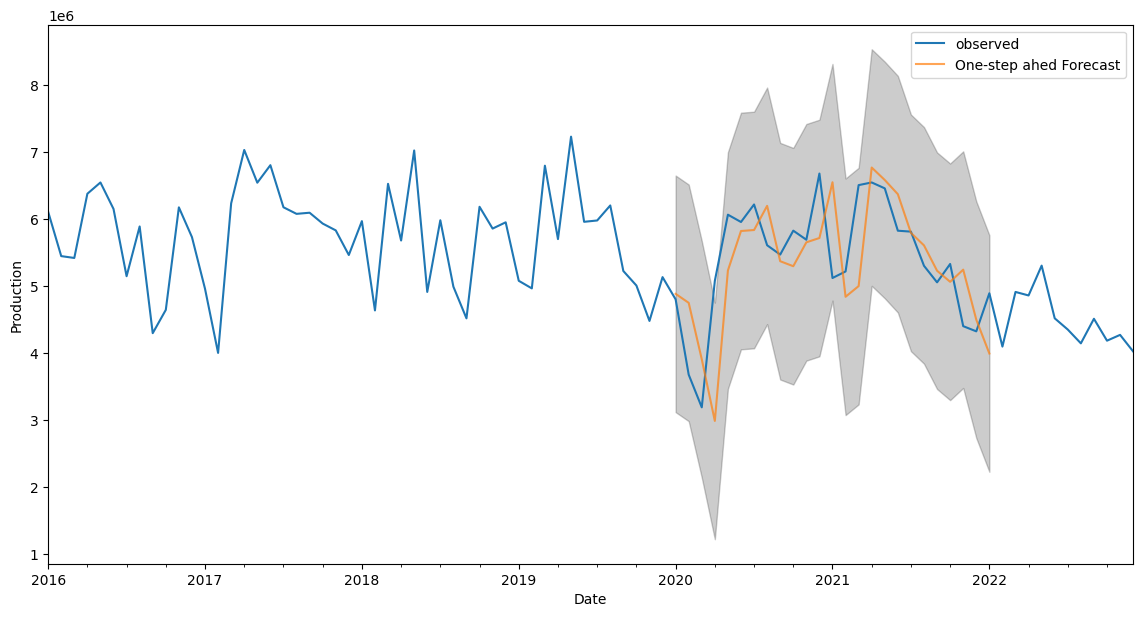

In [93]:
# pred = model_aic.get_prediction(start=pd.to_datetime('2020-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahed Forecast', alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Production')
plt.legend()
plt.show()

In [101]:
import numpy as np

y_forcasted = pred.predicted_mean
y_truth = y['2020-01-01':]

mse = ((y_forcasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {:.2f}'.format(mse))
print('The Root Mean Squared Error of our forecasts is {:.2f}'.format(np.sqrt(mse)))


The Mean Squared Error of our forecasts is 601575287635.66
The Root Mean Squared Error of our forecasts is 775612.85


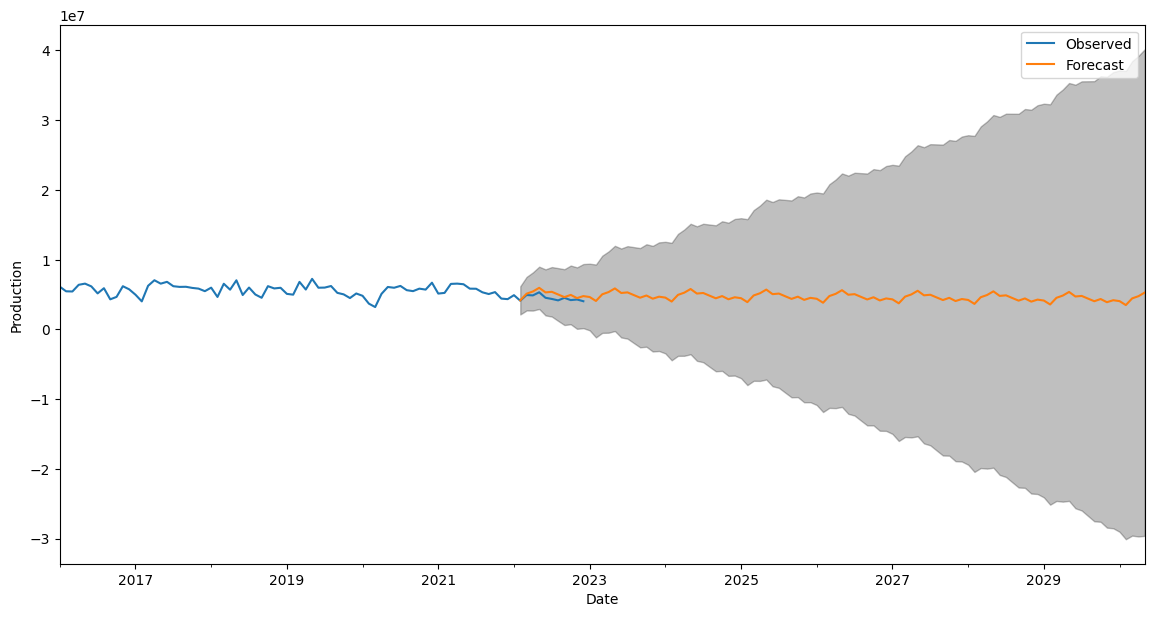

In [100]:
pred_forecast = model_aic.get_forecast(steps=100)
pred_ci = pred_forecast.conf_int()
ax = y.plot(label='Observed',figsize=(14,7))
pred_forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Production')
plt.legend()
plt.show()
